### Exercice 3.3. First order and second order approximation of the derivative.

Text(0.5, 1.0, 'h=2$\\pi$/100')

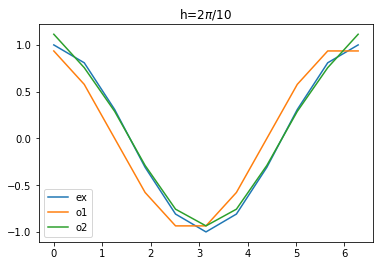

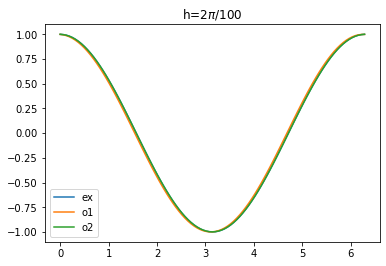

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


def u(x):
    return np.sin(x)

a=0
b=2*np.pi

N1=10
N2=100

h1=(b-a)/N1
h2=(b-a)/N2

# Discrétisation de [0,1] de pas h
x1=np.linspace(a,b,N1+1)
x2=np.linspace(a,b,N2+1)

# vecteur contenant U aux points de la discrétisation
U1=u(x1)
U2=u(x2)

# vecteur contenant U' avec l'approximation U'(x)=(U(x+h)-U(x))/h
V1=np.empty(U1.shape)
V1[:-1]=(U1[1:]-U1[:-1])/h1
V1[-1]=(U1[-1]-U1[-2])/h1

# vecteur contenant U' avec l'approximation U'(x)=(U(x+h)-U(x-h))/2h
W1=np.empty(U1.shape)
W1[1:-1]=(U1[2:]-U1[:-2])/(2*h1)
W1[-1]=(3*U1[-1]-4*U1[-2]+U1[-3])/(2*h1)
W1[0]=(-3*U1[0]+4*U1[1]-U1[2])/(2*h1)

plt.figure(1)
plt.plot(x1,np.cos(x1),label='ex')
plt.plot(x1,V1,label='o1')
plt.plot(x1,W1,label='o2')
plt.legend()
plt.title('h=2$\pi$/10')

V2=np.empty(U2.shape)
V2[:-1]=(U2[1:]-U2[:-1])/h2
V2[-1]=(U2[-1]-U2[-2])/h2

W2=np.empty(U2.shape)
W2[1:-1]=(U2[2:]-U2[:-2])/(2*h2)
W2[-1]=(3*U2[-1]-4*U2[-2]+U2[-3])/(2*h2)
W2[0]=(-3*U2[0]+4*U2[1]-U2[2])/(2*h2)

plt.figure(2)
plt.plot(x2,np.cos(x2),label='ex')
plt.plot(x2,V2,label='o1')
plt.plot(x2,W2,label='o2')
plt.legend()
plt.title('h=2$\pi$/100')


### Exercice 4. First, second and third order approximation of the derivative.

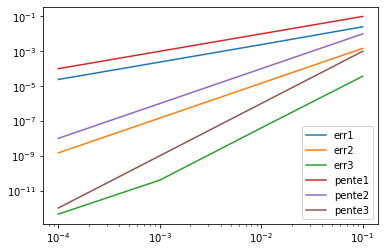

In [21]:
def u(x):
    return np.sin(x)

# derivative of u
def up(x):
    return np.cos(x)

xx=0.5

H=[1/10,1/100,1/1000,1/10000]

Err1=[]
Err2=[]
Err3=[]

for h in H:
    Err1.append(abs(fp(xx)-(u(xx+h)-u(xx))/h))
    Err2.append(abs(fp(xx)-(u(xx+h)-u(xx-h))/(2*h)))
    Err3.append(abs(fp(xx)-(2*u(xx+h)+3*u(xx)-6*u(xx-h)+u(xx-2*h))/(6*h)))          

plt.figure(1)
plt.loglog(H,Err1,label='err1')
plt.loglog(H,Err2,label='err2')              
plt.loglog(H,Err3,label='err3') 
plt.loglog(H,H,label='pente1')
plt.loglog(H,[h**2 for h in H],label='pente2')
plt.loglog(H,[h**3 for h in H],label='pente3')
plt.legend()

### Partie 2.2. Méthodes d'Euler, Heun et RK4.

Text(0.5, 1.0, 'RK4 pour equation logistique')

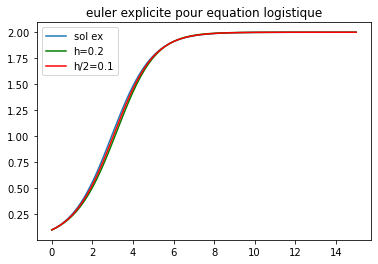

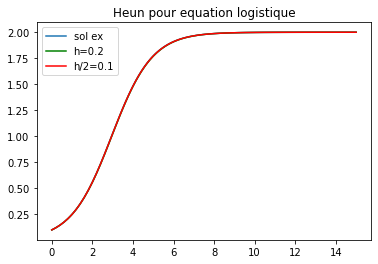

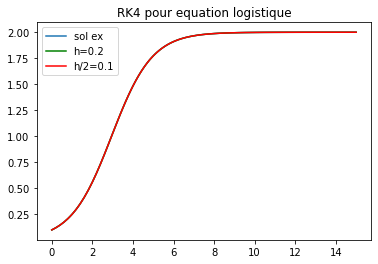

In [22]:
# Schémas numériques
# ------------------

# Il est plus simple de définir d'abord une version scalaire des schémas (c'est à dire un schéma pour approcher une 
# EDO scalaire) :

def euler_exp_s(f,t0,tf,y0,h):
    T=np.append(np.arange(t0,tf,h),tf)
    N=T.size
    y=np.zeros(N)
    y[0]=y0
    for n in range(N-1):
        y[n+1]=y[n]+dt*f(y[n],T[n])
    return T,y

# méthode d'EE programmée vectoriellement, pour un système d'EDO. Elle peut être aussi utilisée dans le cas scalaire
# si on définit y0 comme un numpy array ( par exemple, si y0=1 il faut alors définir y0=np.array([1.]) ). 

def euler_exp(f,t0,tf,y0,h):
    T=np.append(np.arange(t0,tf,h),tf)
    N=T.size
    y=np.zeros((N,y0.size))  
    y[0,:]=y0
    for n in range(N-1):
        y[n+1,:]=y[n,:]+h*f(y[n,:],T[n])
    return T,y

# REMARQUE : Si on a un système de 2 équations, par exemple, de la forme | x'=f1(t,x,y),  
#                                                                        | y'=f2(t,x,y),
#            si on appelle X=(x,y), la solution approchée est (X_0,...,X_N)= ( (x_0,...,x_N) , (y_0,...,y_N) )
#            Dans la fonction euler_exp qu'on a construit, cette solution approchée est gardée dans le tableau y qui
#            a N lignes et 2 colonnes (comme dans odeint).
#            Donc dans la colonne 1 il y a (x_0,...,x_N), les valeurs approchées de la première composante de X, 
#            dans la colonne 2 il y a (y_0,...,y_NN), les valeurs approchées de la deuxième composante de X.

def Heun(f,t0,tf,y0,h):
    T=np.append(np.arange(t0,tf,h),tf)
    N=T.size
    y=np.zeros((N,y0.size))
    y[0,:]=y0
    for n in range(N-1):
        p1=f(y[n,:],T[n])
        p2=f(y[n,:]+h*p1,T[n+1])
        y[n+1,:]=y[n,:]+h*(p1+p2)/2
    return T,y


def RK4(f,t0,tf,y0,h):
    T=np.append(np.arange(t0,tf,h),tf)
    N=T.size
    y=np.zeros((N,y0.size))
    y[0,:]=y0
    for n in range(N-1):
        p1=f(y[n,:],T[n])
        p2=f(y[n,:]+h*p1/2,T[n]+h/2)
        p3=f(y[n,:]+h*p2/2,T[n]+h/2)
        p4=f(y[n,:]+h*p3,T[n]+h)
        y[n+1,:]=y[n,:]+(p1+2*p2+2*p3+p4)/6
        y[n+1]=y[n]+h*(p1+2*p2+2*p3+p4)/6
    return T,y


# Fonctions f second membre de l'EDO
# ----------------------------------

# Q2 - (P1)
def fS1(y,t,b=2.,c=1.):
    return c*y*(1.-y/b)

# Q3 - (P2)
def fS3(y,t): # Ecriture vectorielle u=y, v=y'
    return np.array([y[1],-y[0]+np.cos(t)])

# Solutions exactes des EDO
# -------------------------

# Q2
def u1(t,a=0.1,b=2.,c=1.):
    return b/(1+(np.exp(-c*t))*(b-a)/a)

# Q3
def u3(t):
    return np.sin(t)*t/2+5*np.cos(t)+np.sin(t)


# Paramètres Ex 5 - Q2
# --------------------

t0=0
tf=15

a=0.1

h=0.2

y0=np.array([a])

# Solutions approchées par EE, Heun et RK4
# ----------------------------------------

T1E,y1E=euler_exp(fS1,t0,tf,y0,h)
T2E,y2E=euler_exp(fS1,t0,tf,y0,h/2)

T1H,y1H=Heun(fS1,t0,tf,y0,h)
T2H,y2H=Heun(fS1,t0,tf,y0,h/2)

T1RK4,y1RK4=RK4(fS1,t0,tf,y0,h)
T2RK4,y2RK4=RK4(fS1,t0,tf,y0,h/2)

# pour représenter la solution exacte
pas=10**(-4)
vect=np.arange(t0,tf+pas,pas)

plt.figure(1)
plt.plot(vect,u1(vect),label='sol ex')
plt.plot(T1E, y1E,'g',label='h='+str(h))
plt.plot(T2E, y2E,'r',label='h/2='+str(h/2))
plt.legend()
plt.title('euler explicite pour equation logistique')

plt.figure(2)
plt.plot(vect,u1(vect),label='sol ex')
plt.plot(T1H, y1H,'g',label='h='+str(h))
plt.plot(T2H, y2H,'r',label='h/2='+str(h/2))
plt.legend()
plt.title('Heun pour equation logistique')

plt.figure(3)
plt.plot(vect,u1(vect),label='sol ex')
plt.plot(T1RK4, y1RK4,'g',label='h='+str(h))
plt.plot(T2RK4, y2RK4,'r',label='h/2='+str(h/2))
plt.legend()
plt.title('RK4 pour equation logistique')


Text(0.5, 1.0, 'EE, H et RK4 pour (P2)')

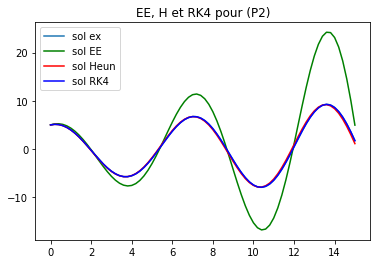

In [23]:
# Paramètres Ex 5 - Q3 (P2)
# -------------------------

t0=0
tf=15

h=0.2

y0=np.array([5.,1.])

# Solutions approchées par EE, Heun et RK4
# ----------------------------------------

TE,yE=euler_exp(fS3,t0,tf,y0,h)
TH,yH=Heun(fS3,t0,tf,y0,h)
TRK4,yRK4=RK4(fS3,t0,tf,y0,h)

# pour représenter la solution exacte
pas=10**(-4)
vect=np.arange(t0,tf+pas,pas)

plt.figure(1)
plt.plot(vect,u3(vect),label='sol ex')
plt.plot(TE, yE[:,0],'g',label='sol EE') # on représente y, donc uniquement la première colonne de la solution
#                                     (y[:,0]=y,y[:,1]=y')
plt.plot(TH, yH[:,0],'r',label='sol Heun')
plt.plot(TRK4, yRK4[:,0],'b',label='sol RK4')
plt.legend()
plt.title('EE, H et RK4 pour (P2)')


### Exercice 8. Etude de l'ordre

Text(0, 0.5, 'log(E)')

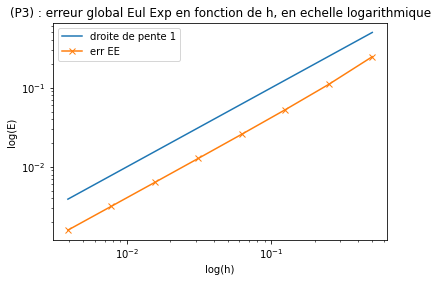

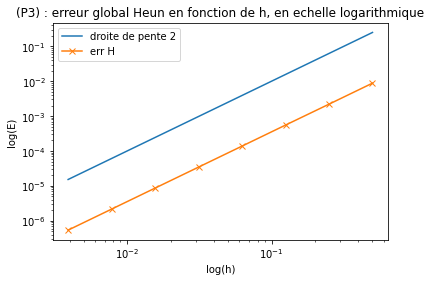

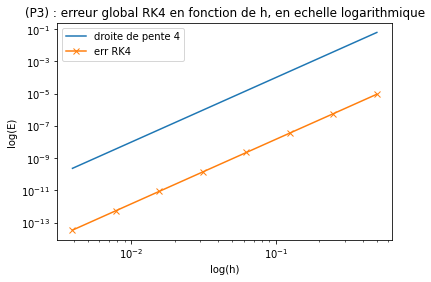

In [24]:
# Problème (P3)

def fS2(y,t):
    return (np.cos(t)-y)/(1+t)

def u2(t):
    return (np.sin(t)-1./4)/(1+t)


t0=0
tf=20
y0=np.array([-1./4])
h=0.5

# listes ou on va garder les pasde temps et les erreurs globales correspondantes a chaque pas de temps

vec_h=[]
vec_errE=[]
vec_errH=[]
vec_errRK4=[]

for k in range(8):
    TE,yE=euler_exp(fS2,t0,tf,y0,h)
    EE=max(abs(yE[:,0]-u2(TE)))
    TH,yH=Heun(fS2,t0,tf,y0,h)
    EH=max(abs(yH[:,0]-u2(TH)))
    TRK4,yRK4=RK4(fS2,t0,tf,y0,h)
    ERK4=max(abs(yRK4[:,0]-u2(TRK4)))
    vec_h.append(h)
    vec_errE.append(EE)
    vec_errH.append(EH)
    vec_errRK4.append(ERK4)
    h=h/2

plt.figure(4)
plt.plot(vec_h,vec_h,'-',label='droite de pente 1')
plt.plot(vec_h,vec_errE,'x-',label='err EE') 
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('(P3) : erreur global Eul Exp en fonction de h, en echelle logarithmique')
plt.xlabel('log(h)')
plt.ylabel('log(E)')

plt.figure(5)
plt.plot(vec_h,[hh**2 for hh in vec_h],'-',label='droite de pente 2')
plt.plot(vec_h,vec_errH,'x-',label='err H') 
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('(P3) : erreur global Heun en fonction de h, en echelle logarithmique')
plt.xlabel('log(h)')
plt.ylabel('log(E)')

plt.figure(6)
plt.plot(vec_h,[hh**4 for hh in vec_h],'-',label='droite de pente 4')
plt.plot(vec_h,vec_errRK4,'x-',label='err RK4') 
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('(P3) : erreur global RK4 en fonction de h, en echelle logarithmique')
plt.xlabel('log(h)')
plt.ylabel('log(E)')


### 2.2.1 Simulation du système de Van der Pol par la méthode d'Euler implicite en utilisant la méthode de Newton.

In [64]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.linalg as slin
import matplotlib.pyplot as plt

ep= 10

# Fonctions définissant VDP, DF nécéssaire pour Newton

def F(Y): 
    x=Y[0]
    y=Y[1]
    F1=ep*(x-(x**3)/3)+y
    F2=-x
    return np.array([F1,F2])

def DF(Y): 
    x=Y[0]
    y=Y[1]
    DFL1=np.array([ep-ep*x**2,1])
    DFL2=np.array([-1,0])
    return np.array([DFL1,DFL2])

In [65]:
def Newton(eps,G,DG,Y0,nmax):
    tol=np.linalg.norm(G(Y0))
    n=1
    Y=Y0
    while (tol>eps and n<nmax):
        X=Y.copy()
        Y=X-np.dot(slin.inv(DG(X)),G(X))
        n+=1
        tol=np.linalg.norm(G(Y))
    return n,Y

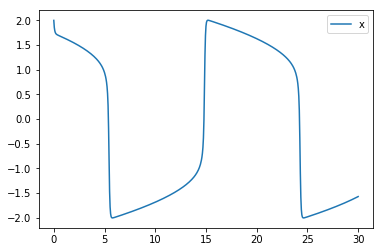

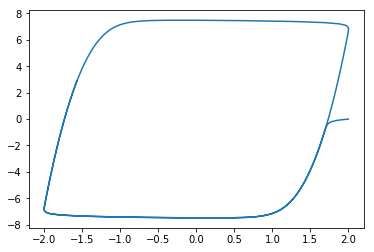

In [66]:
T=30

x0=2

y0=0

h=0.05

def EI(F,t0,tf,Y0,h):
    t=np.append(np.arange(t0,tf,h),tf)
    N=t.size
    Y=np.zeros((Y0.size,N))
    Y[:,0]=Y0

    tol=10^-3
    nmax=50

    for n in range(N-1):
        G=lambda x : x-Y[:,n]-h*F(x)
        DG=lambda x : np.eye(2)-h*DF(x)
        nn,X=Newton(tol,G,DG,Y[:,n],nmax)
        Y[:,n+1]=X
    return t,Y


Y0=np.array([x0,y0])

t0=0
tf=T

t,Y=EI(F,t0,tf,Y0,h)

plt.figure(1)
plt.plot(t,Y[0,:],label='x')
plt.legend()

plt.figure(2)
plt.plot(Y[0,:],Y[1,:])
plt.legend()



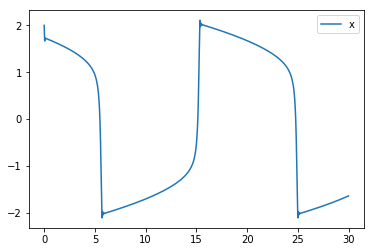

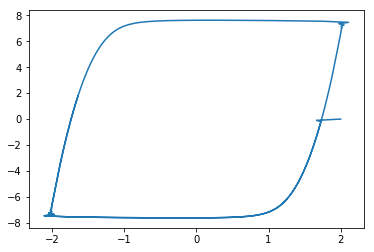

In [67]:
# Avec Euler explicite

def FF(Y,t): 
    x=Y[0]
    y=Y[1]
    F1=ep*(x-(x**3)/3)+y
    F2=-x
    return np.array([F1,F2])

tE,YE=euler_exp(FF,t0,tf,Y0,h)

plt.figure(1)
plt.plot(tE,YE[:,0],label='x')
plt.legend()

plt.figure(2)
plt.plot(YE[:,0],YE[:,1])
plt.legend()


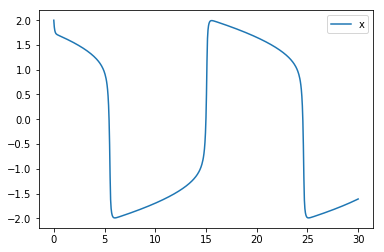

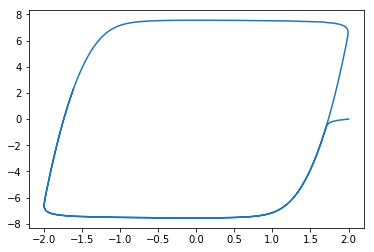

In [68]:
# Avec Heun explicite


tH,YH=Heun(FF,t0,tf,Y0,h)

plt.figure(1)
plt.plot(tH,YH[:,0],label='x')
plt.legend()

plt.figure(2)
plt.plot(YH[:,0],YH[:,1])
plt.legend()


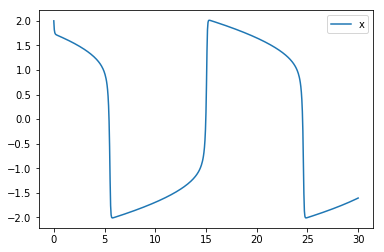

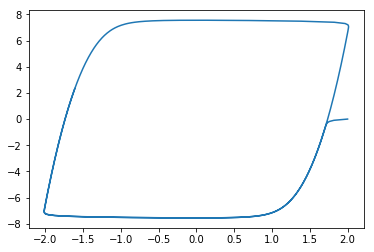

In [69]:
# Avec RK4

tRK4,YRK4=RK4(FF,t0,tf,Y0,h)

plt.figure(1)
plt.plot(tRK4,YRK4[:,0],label='x')
plt.legend()

plt.figure(2)
plt.plot(YRK4[:,0],YRK4[:,1])
plt.legend()


In [59]:
# REMARQUES FINALES : Heun et RK4 sont assez comparables à EI, mais si le pas est plus grossier (par exemple 0.1), 
# EE, Heun et RK4 se détiorent. 